# Ejercicios de optimización escalar

**Para la siguientes funciones encuentre los puntos críticos, grafique y diga si éste se trata de un máximo o mínimo, local o global.**

$f(x)=1260+117x-9x^2$

In [11]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

%matplotlib inline

x = sp.var("x")

def f(x) :
    return 1260 + 117*x - 9*x**2


In [13]:
fs = f(x)
fs

-9*x**2 + 117*x + 1260

In [14]:
dfs = sp.diff(fs, x)
dfs

117 - 18*x

In [19]:
pc = sp.solve(dfs, x)
pc

[13/2]

In [20]:
type(pc)

list

In [21]:
pc = pc[0]
pc

13/2

In [22]:
type(pc)

sympy.core.numbers.Rational

In [23]:
ddfs = sp.diff(dfs, x)
ddfs

-18

In [26]:
type(ddfs)

sympy.core.numbers.Integer

In [31]:
criterio_segunda_derivada = ddfs.subs(x, pc)
if criterio_segunda_derivada < 0 :
    print("max")
elif criterio_segunda_derivada > 0 :
    print("min")
else :
    print("sepa")


max


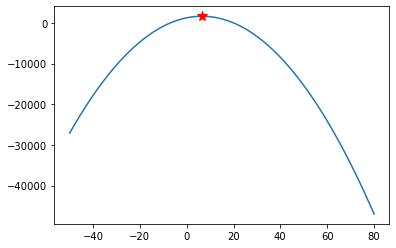

In [18]:
# Graficamos

# Crear figura
plt.figure()

# Crear rango
xn = np.linspace(start=-50,
                 stop=80,
                 num=10000)
yn = f(xn)

plt.plot(xn, yn)

# pc = 117/18
plt.plot( pc, f(pc), "*r", ms=10)


$f(x)=5+x+\frac{4}{x}$, para $x>0$

In [12]:
def f(x) :
    return 5 + x + 4/x
f(x)

x + 5 + 4/x

In [13]:
df = sp.diff(f(x), x)
df

1 - 4/x**2

In [14]:
pc = sp.solve(df, x)
pc

[-2, 2]

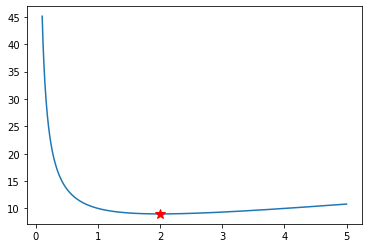

In [15]:
# Graficamos

# Crear figura
plt.figure()

# Crear rango
xn = np.linspace(start=0.1,
                 stop=5,
                 num=1000)
yn = f(xn)

plt.plot(xn, yn)

# pc = 117/18
plt.plot( pc[1], f(pc[1]), "*r", ms=10)

$f(x)=6-2x+\sqrt{18-2x^2}$, para $-3\leq x\leq 3$

In [24]:
def f(x) :
    return 6 - 2*x + sp.sqrt(18 - 2*x**2)
f(x)

-2*x + sqrt(18 - 2*x**2) + 6

In [18]:
df = sp.diff(f(x), x)
df

-2*x/sqrt(18 - 2*x**2) - 2

In [21]:
pc = sp.solve(df, x)
pc

[-sqrt(6)]

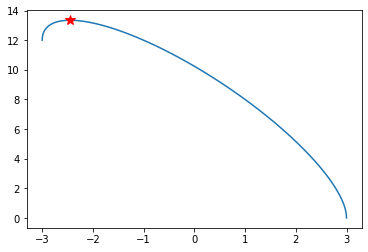

In [35]:
# Graficamos

# work-around para generar el y numérico
def fn(x) :
    return 6 - 2*x + np.sqrt(18 - 2*x**2)

fn = sp.lambdify(x, f(x), "numpy")

# Crear figura
plt.figure()

# Crear rango
xn = np.linspace(start=-3,
                 stop=3,
                 num=1000)
yn = fn(xn)

plt.plot(xn, yn)

plt.plot( pc[0], f(pc[0]), "*r", ms=10)

$f(x)=\frac{1}{4}x^4+\frac{1}{3}x^3-x^2$ en el intervalo $[-3,1.7]$

In [38]:
def f(x) :
    return x**4/4 + x**3/3 - x**2
f(x)

x**4/4 + x**3/3 - x**2

In [39]:
df = sp.diff(f(x), x)
df

x**3 + x**2 - 2*x

In [40]:
pc = sp.solve(df, x)
pc

[-2, 0, 1]

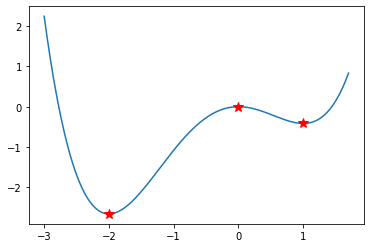

In [42]:
# Crear figura
plt.figure()

# Crear rango
xn = np.linspace(start=-3,
                 stop=1.7,
                 num=1000)
yn = f(xn)

plt.plot(xn, yn)

for punto in pc :
    plt.plot( punto, f(punto), "*r", ms=10)

---
**Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento.**

El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

El radio es un medio de la base, y la altura se puede calcular usando pitágoras

$$ r = b/2 $$

$$ h^2 = r^2 - l^2 $$

$$ h^2 = (\frac{b}{2})^2 - l^2 $$


Se quiere maximizar $ \frac{1}{3} \pi r^2 h $

$$ \frac{1}{3} \pi (\frac{b}{2})^2 \sqrt{(\frac{b}{2})^2 - l^2} $$

Sabemos que

$$ 2 l + b = 10 $$

Despejamos y

$$ b = 10 - 2l $$

In [44]:
l = sp.var("l")
b = sp.var("b")

def r(b) :
    return b/2

def h(b, l) :
    return sp.sqrt(l**2 - r(b)**2)

def volumen(b, l) :
    r2 = r(b)**2
    altura = h(b, l)
    return sp.pi*r2*altura/3

volumen(b, l)

pi*b**2*sqrt(-b**2/4 + l**2)/12

In [47]:
volumen_subs = volumen(b, l).subs(b, 10-2*l)
volumen_subs

pi*(10 - 2*l)**2*sqrt(l**2 - (10 - 2*l)**2/4)/12

In [48]:
dvolumen = sp.diff(volumen_subs, l)
dvolumen

5*pi*(10 - 2*l)**2/(12*sqrt(l**2 - (10 - 2*l)**2/4)) + pi*(8*l - 40)*sqrt(l**2 - (10 - 2*l)**2/4)/12

In [57]:
pc = sp.solve(dvolumen, l)
pc

[3, 5]

In [51]:
volumen_n = sp.lambdify(l, volumen_subs, "numpy")

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return ((1/12)*pi*(10 - 2*l)**2*sqrt(l**2 - 1/4*(10 - 2*l)**2))


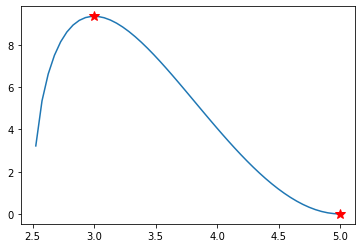

In [66]:
# Crear figura
plt.figure()

# Crear rango
ln = np.linspace(start=0,
                 stop=5,
                 num=100)
voln = volumen_n(ln)

plt.plot(ln, voln)

plt.plot(3, volumen_n(3), "*r", ms=10)
plt.plot(5, volumen_n(5), "*r", ms=10)


Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

Misma lógica.

restricción es que $ 2 post + trav = 6 $

reescribimos a $ trav = 6 - 2 post $

In [69]:
x = sp.var("x") # post
y = sp.var("y") # trav

def area(x, y) :
    return x*y

def trav(x) :
    return 6 - 2*x

area_subs = area(x, y).subs(y, trav(x))
area_subs

x*(6 - 2*x)

In [70]:
darea = sp.diff(area_subs, x)
darea

6 - 4*x

In [71]:
pc = sp.solve(darea, x)
pc

[3/2]

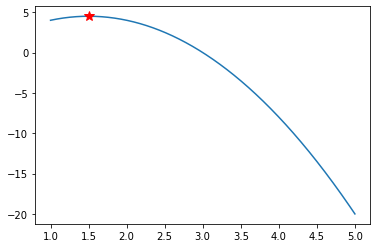

In [73]:
fn = sp.lambdify(x, area_subs, "numpy")

# Crear figura
plt.figure()

# Crear rango
xn = np.linspace(start=1,
                 stop=5,
                 num=1000)
yn = fn(xn)

plt.plot(xn, yn)

for punto in pc :
    plt.plot( punto, fn(punto), "*r", ms=10)